R² with Outliers: 0.2334
R² without Outliers: 0.2826


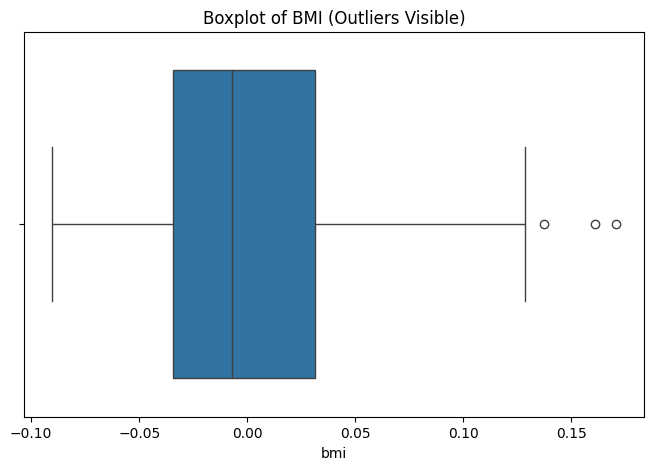

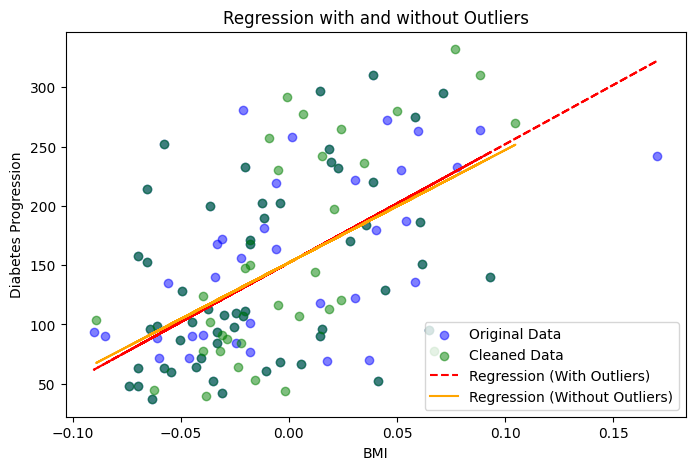

In [ ]:
#TASK7
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

df['Z_score'] = np.abs(zscore(df['bmi']))
df_clean = df[df['Z_score'] <= 3]  

X = df[['bmi']]
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_clean = df_clean[['bmi']]
y_clean = data.target[df_clean.index]
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model = LinearRegression()
model_clean = LinearRegression()

model.fit(X_train, y_train)
model_clean.fit(X_train_clean, y_train_clean)

y_pred = model.predict(X_test)
y_pred_clean = model_clean.predict(X_test_clean)

r2 = r2_score(y_test, y_pred)
r2_clean = r2_score(y_test_clean, y_pred_clean)

print(f'R² with Outliers: {r2:.4f}')
print(f'R² without Outliers: {r2_clean:.4f}')

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title("Boxplot of BMI (Outliers Visible)")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Original Data', alpha=0.5)
plt.scatter(X_test_clean, y_test_clean, color='green', label='Cleaned Data', alpha=0.5)

plt.plot(X_test, y_pred, color='red', linestyle='--', label='Regression (With Outliers)')
plt.plot(X_test_clean, y_pred_clean, color='orange', linestyle='-', label='Regression (Without Outliers)')

plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Regression with and without Outliers')
plt.legend()
plt.show()
